#Wine Quality Logistic Regression

# ?) What is the model's main goal

Our goal is to evaluate wines into one of 3 classes (Good, Average, Bad) using their fermentation characteristics.

For this specific task, we implemented the Wine Quality database (link: https://archive.ics.uci.edu/dataset/186/wine+quality), specifically the .csv file of red wines. There is also a database with white wines, but we considered that the number of red wines (1599 rows) was sufficient for our model.

#?) Describe the wine database

**Table Dimensions**: 1599 rows x 12 columns

**Number of Continuous Variables**: 11

**Table Columns and their Descriptions**:

**Continuous Variables**

1) Fixed Acidity: Refers to the total percentage of acid in the wine. It affects the acidity and structure of the wine.

2) Volatile Acidity: This acid is more flammable and can lead to unexpected flavors (such as sourness or sour apple) when present in high levels.

3) Citric Acid: Adds freshness and brightness to the aroma and taste of the wine.

4) Residual Sugar: The percentage of sugar remaining after fermentation. It affects the sweetness of the wine.

5) Chlorides: Even in small amounts, they influence the taste of the wine. Excessive amounts can give a salty sensation.

6) Free Sulfur Dioxide: Used as a stabilizer and in protection against microbial breakdown.

7) Total Sulfur Dioxide: The total sum of free and bound sulfur dioxide. It can affect the aging potential and quality of the wine.

8) Density: Related to the concentration of solid substances in the wine. It can provide a fuller mouthfeel.

9) pH: Refers to the level of acidity or alkalinity of the wine. It affects the stability and structure of the wine.

10) Sulphates: Can improve the wine's shelf life and structure.

11) Alcohol: The percentage of alcohol influences the warmth and structure of the wine.

Each of these characteristics contributes to the final result of the wine, affecting its taste, structure, and aromas.

# **Output Variable**

12) quality (score between 0 and 10): Wine score. Useful for the final classification (explanation to follow)

In [ ]:
print('Importing modules')

Importing modules


In [ ]:
# Libraries used to handle databases, arrays and draw diagrams
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
print('All modules imported!')

All modules imported!


**Note**: For the following cell to work, the file winequality-red.csv must be located in the Files on Google Drive.

How To: In Google Colab Files, Right-click + Upload File + Select .csv

In [ ]:
print('Getting the Red Wine database')
red_wines = pd.read_csv('winequality-red.csv', sep=';')

Getting the Red Wine database


In [ ]:
# Check all database's columns (must be 12 in total)

print('Columns of database')
columns = red_wines.columns
for i, column in enumerate(columns, start=1):
    print(f"{i}) {column}")

Columns of database
1) fixed acidity
2) volatile acidity
3) citric acid
4) residual sugar
5) chlorides
6) free sulfur dioxide
7) total sulfur dioxide
8) density
9) pH
10) sulphates
11) alcohol
12) quality


In [ ]:
# Always check if null values exist in database to avoid errors during model's training

print('Check if any null values exist in data')
print(red_wines.isnull().sum())

Check if any null values exist in data
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
# Check the first 5 rows of the table to get a first glimpse
red_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# We need 1599 instances of red wines
print('There are %d instances in the dataset' % len(red_wines))

There are 1599 instances in the dataset


# ?) Why we need the quality column

At the beginning, we mentioned that our model evaluates wines as "Good," "Average," and "Bad." However, we see that our database does not have a column with such a classification.

Therefore, we will make a modification. Specifically, based on the quality measurements, we will define the corresponding characterization of the wine.

0-4: Bad

5-6: Mediocre

7-10: Good

This way, we don't need to create a new column or take quality as an additional feature.

In [ ]:
print('Check all unique values in quality column')
pd.unique(red_wines.quality)

Check all unique values in quality column


array([5, 6, 7, 4, 8, 3])

How many wines have the above qualities?


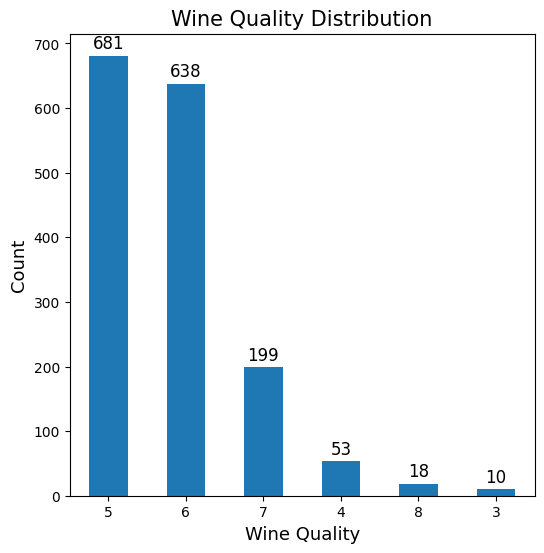

In [ ]:
print('How many wines have the above qualities?')
fig, ax = plt.subplots(figsize=(6,6)) # 6x6 diagram

# We make a bar diagram which counts all qualities
red_wines.quality.value_counts().plot(kind='bar', ax=ax)
rects = ax.patches
for rect, label in zip(rects, red_wines.quality.value_counts().values):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xlabel('Wine Quality', fontsize=13)
ax.set_ylabel('Count', fontsize=13)
ax.set_title('Wine Quality Distribution', fontsize=15)
plt.show()

In [ ]:
# There, we set the 3 classes we want based on quality scores
print('Replace the values in quality column to keep 3 unique values')
red_wines['quality'] = red_wines.quality.replace({0:'Bad', 1:'Bad', 2:'Bad', 3:'Bad', 4:'Bad', 5:'Mediocre',
                                                  6:'Mediocre', 7:'Good', 8:'Good', 9:'Good', 10:'Good'})
print('Unique values now: ', pd.unique(red_wines.quality))

Replace the values in quality column to keep 3 unique values
Unique values now:  ['Mediocre' 'Good' 'Bad']


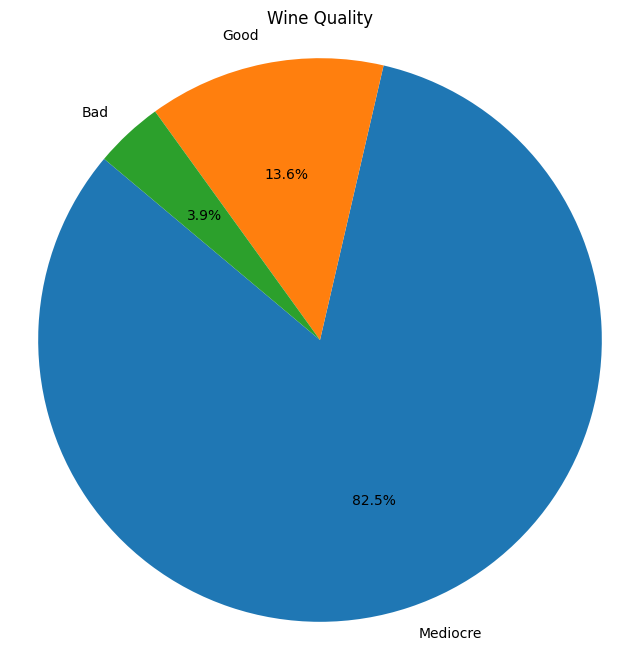

In [ ]:
quality_counts = red_wines['quality'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Wine Quality')
plt.show()

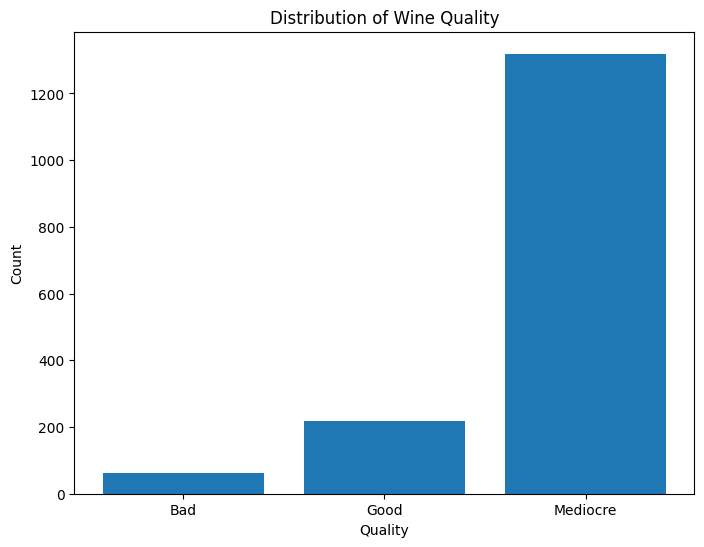

In [ ]:
quality_counts = red_wines['quality'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.bar(quality_counts.index.astype(str), quality_counts)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality')
plt.show()

At this point, our database consists of 11 columns of continuous variables and one column with the actual evaluations, which represent our 3 desired classes.

Therefore, our problem now is:

"Multiclass classification with 3 classes and 11 features"

In [ ]:
# Check the first 5 rows again with the quality column changed
red_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Mediocre
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Mediocre
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Mediocre
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Mediocre
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Mediocre


In [ ]:
pd.value_counts(red_wines.quality)

Mediocre    1319
Good         217
Bad           63
Name: quality, dtype: int64

Next, we will proceed with building our Logistic Regression model.

The requirements are as follows:


- "You should train your model using the Stochastic Gradient Descent algorithm. As the loss function, you should use CrossEntropyLoss."

In [ ]:
# Get data for both training and testing
y = red_wines.quality # 12 column
X = red_wines.drop('quality', axis=1) # first 11 columns

In [ ]:
# use sklearn ONLY to split data to training and testing data
from sklearn.model_selection import train_test_split

Our training data constitutes 80% of the total dataset. We will use the remaining 20% to evaluate the performance of our algorithm.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

In [ ]:
print("Train set length:", len(X_train))
print("Test set length:", len(X_test))

print("\nTrain set null values:")
print(X_train.isnull().sum())

print("\nTest set null values:")
print(X_test.isnull().sum())

Train set length: 1279
Test set length: 320

Train set null values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

Test set null values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


In [ ]:
# Check all possible classes
num_classes = len(np.unique(y_train))

In [ ]:
print('How many classes are there?: ', num_classes)

How many classes are there?:  3


In [ ]:
w = np.zeros((X_train.shape[1], num_classes))
b = np.zeros(num_classes)
learning_rate = 0.001

In [ ]:
print("Shape of w:", w.shape)
print("Shape of b:", b.shape)

Shape of w: (11, 3)
Shape of b: (3,)


# ?) What Multinomial Logistic Regression means

Multinomial Logistic Regression is a form of logistic regression used when there are three or more discrete classes in classification tasks.

The model predicts the probability of each category as the response. Depending on the number of possible categories, different functions are used to compute the probabilities and select the final category that corresponds to the most likely outcome.

In Multinomial Logistic Regression, each weight corresponds to a feature and a class, and the model is trained to find weights that best predict the category for each observation.

In short,

"Compute the probability for each class and assign the label corresponding to the highest probability."

# *Custom LogisticRegressionSGD class Analysis:*

- **num_classes**: The number of classes that the model can predict.

- **learning_rate**: Adjustable parameter affecting how quickly the model learns from data.

- **num_epochs**: Number of times the model will be trained on the input data.

- **batch_size**: Number of samples used in each iteration of Stochastic Gradient Descent.

- **w**: Weights used in training the model.

- **b**: Bias added to the result of the multiplication of features with weights before applying the sigmoid function or softmax function.

- **Sigmoid**: Used to transform the linear function into a probability prediction between 0 and 1.

- **Softmax**: Used to convert the model outputs into probabilities for each class.

- **Cross Entropy Loss**: Used to measure the "cost" incurred between actual and predicted probabilities. The goal is to minimize the cost during training.

- **One Hot Encode**: Used to convert categorical variables into a form that can be used by the model. In our case, we have three classes, so 3 values ('Bad': 0, 'Mediocre': 1, 'Good': 2).

- **Fit**: Trains the model using Stochastic Gradient Descent. It iterates through multiple epochs and applies the method to small batches of data.

- **Predict**: Uses the trained model to predict classes of new input samples. It uses the Softmax function for multiclass classification and selects the class with the highest probability.

### Step 1: Initialization
Initialize w,b with random values.

### Step 2: Functions used
#### Sigmoid
$$ σ(z) = \frac{1}{1 + e^{-z}} $$

#### Softmax
$$ {y_nk}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}} $$

#### Cross-Entropy
$$ {L_CE}(\mathbf{y_{true}}, \mathbf{y_{pred}}) = -\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{K} y_{true, i} \cdot \log(y_{pred, i}) $$

### Step 3: Fit
For each epoch:

1. Split training data into small batches.
2. Convert class labels using one-hot encoding.
3. Compute predictions y_pred using softmax and cross_entropy_loss functions.
4. Compute gradients for w, b.
5. Update weights based on gradients and learning rate

### Step 4: Predict
Use trained weights to predict classes of new data.


In [ ]:
class LogisticRegressionSGD:
    def __init__(self, num_classes, learning_rate=0.001, num_epochs=1000, batch_size=32):
        self.num_classes = num_classes
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.w = None
        self.b = None
        self.losses = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / exp_z.sum(axis=1, keepdims=True)

    def cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

    def one_hot_encode(self, labels):
        one_hot_labels = np.zeros((len(labels), self.num_classes))
        one_hot_labels[np.arange(len(labels)), labels] = 1
        return one_hot_labels

    def fit(self, X_train, y_train):
        np.random.seed(42)
        self.w = np.random.randn(X_train.shape[1], self.num_classes)
        self.b = np.zeros(self.num_classes)

        for epoch in range(self.num_epochs):
            for i in range(0, len(X_train), self.batch_size):
                X_batch = X_train[i:i + self.batch_size]
                y_batch = self.one_hot_encode(y_train[i:i + self.batch_size].map({'Bad': 0, 'Mediocre': 1, 'Good': 2}))

                y_pred = self.softmax(np.dot(X_batch, self.w) + self.b)
                loss = self.cross_entropy_loss(y_batch, y_pred)
                self.losses.append(loss)

                grad_w = np.dot(X_batch.T, (y_pred - y_batch)) / self.batch_size
                grad_b = np.mean(y_pred - y_batch, axis=0)

                self.w -= self.learning_rate * grad_w
                self.b -= self.learning_rate * grad_b

    def predict(self, X):
        return np.argmax(self.softmax(np.dot(X, self.w) + self.b), axis=1)


In [ ]:
logreg = LogisticRegressionSGD(num_classes=3)
logreg.fit(X_train, y_train)

train_predictions = logreg.predict(X_train)
test_predictions = logreg.predict(X_test)

View Cross entropy loss

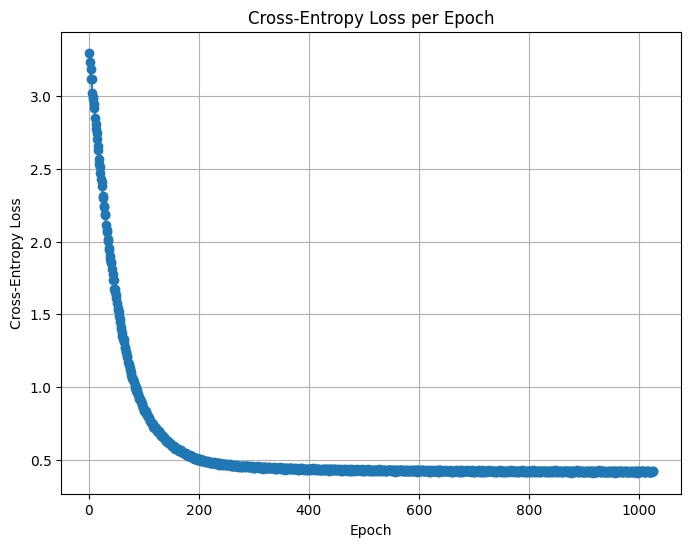

In [ ]:
losses = logreg.losses

# Group losses per epoch based on batch size
losses_per_epoch = [losses[i:i + len(X_train) // logreg.batch_size] for i in range(0, len(losses), len(X_train) // logreg.batch_size)]
epoch_losses = [np.mean(epoch) for epoch in losses_per_epoch]

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(epoch_losses) + 1), epoch_losses, marker='o', linestyle='-')
plt.title('Cross-Entropy Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.grid(True)
plt.show()

In [ ]:
# Here, we use sklearn ONLY to calculate important scores (Accuracy, Precision, Recall, F1 Score)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [ ]:
# Convert string labels to numeric labels
label_map = {'Bad': 0, 'Mediocre': 1, 'Good': 2}
y_train_numeric = y_train.map(label_map)
train_predictions_numeric = train_predictions

y_test_numeric = y_test.map(label_map)
test_predictions_numeric = test_predictions

In [ ]:
train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(y_train_numeric, train_predictions_numeric, average='weighted')

In [ ]:
test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(y_test_numeric, test_predictions_numeric, average='weighted')

In [ ]:
train_accuracy = accuracy_score(y_train_numeric, train_predictions_numeric)
test_accuracy = accuracy_score(y_test_numeric, test_predictions_numeric)

- **Accuracy**: The accuracy of our model. It represents the percentage of correct predictions out of the total predictions.

- **Precision**: Refers to the ability of the model to correctly predict positive predictions relative to the total predictions it makes for that particular class.

- **Recall**: Identifies all true positive samples for a specific class.

- **F1 Score**: Calculated as the harmonic mean of precision and recall, providing a numerical way to assess the overall performance of the model.

In [ ]:
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("\nTraining Precision:", train_precision)
print("Testing Precision:", test_precision)
print("\nTraining Recall:", train_recall)
print("Testing Recall:", test_recall)
print("\nTraining F1-score:", train_f1)
print("Testing F1-score:", test_f1)

Training Accuracy: 0.8428459734167318
Testing Accuracy: 0.8375

Training Precision: 0.8172469109730346
Testing Precision: 0.8107700892857143

Training Recall: 0.8428459734167318
Testing Recall: 0.8375

Training F1-score: 0.813577669710145
Testing F1-score: 0.8095245796861968


# SGDClassifier Comparison

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Instantiate scikit-learn's SGDClassifier for logistic regression
sgd_logreg = SGDClassifier(loss='log', max_iter=1000, alpha=0.0001, random_state=42)

# Train the model
sgd_logreg.fit(X_train, y_train)

# Predict using scikit-learn model
sgd_train_predictions = sgd_logreg.predict(X_train)
sgd_test_predictions = sgd_logreg.predict(X_test)

# Calculate accuracy
sgd_train_accuracy = accuracy_score(y_train, sgd_train_predictions)
sgd_test_accuracy = accuracy_score(y_test, sgd_test_predictions)

# Calculate precision, recall, f1-score for each class
sgd_train_precision, sgd_train_recall, sgd_train_f1, _ = precision_recall_fscore_support(y_train, sgd_train_predictions, average='weighted')
sgd_test_precision, sgd_test_recall, sgd_test_f1, _ = precision_recall_fscore_support(y_test, sgd_test_predictions, average='weighted')

print("SGD Logistic Regression Training Accuracy:", sgd_train_accuracy)
print("SGD Logistic Regression Testing Accuracy:", sgd_test_accuracy)
print("\nSGD Logistic Regression Training Precision:", sgd_train_precision)
print("SGD Logistic Regression Testing Precision:", sgd_test_precision)
print("\nSGD Logistic Regression Training Recall:", sgd_train_recall)
print("SGD Logistic Regression Testing Recall:", sgd_test_recall)
print("\nSGD Logistic Regression Training F1-score:", sgd_train_f1)
print("SGD Logistic Regression Testing F1-score:", sgd_test_f1)


SGD Logistic Regression Training Accuracy: 0.8264268960125097
SGD Logistic Regression Testing Accuracy: 0.825

SGD Logistic Regression Training Precision: 0.7963019377422613
SGD Logistic Regression Testing Precision: 0.8142282196969697

SGD Logistic Regression Training Recall: 0.8264268960125097
SGD Logistic Regression Testing Recall: 0.825

SGD Logistic Regression Training F1-score: 0.7923308758848342
SGD Logistic Regression Testing F1-score: 0.7923775241805888


In [ ]:
# Calculate the differences between custom implementation and scikit-learn SGD Logistic Regression
train_accuracy_diff = train_accuracy - sgd_train_accuracy
test_accuracy_diff = test_accuracy - sgd_test_accuracy

train_precision_diff = train_precision - sgd_train_precision
test_precision_diff = test_precision - sgd_test_precision

train_recall_diff = train_recall - sgd_train_recall
test_recall_diff = test_recall - sgd_test_recall

train_f1_diff = train_f1 - sgd_train_f1
test_f1_diff = test_f1 - sgd_test_f1

# Display the comparative metrics
print("Metric\t\t\t\tCustom\t\tSGD\t\tDifference")
print("Training Accuracy:\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(train_accuracy, sgd_train_accuracy, train_accuracy_diff))
print("Testing Accuracy:\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(test_accuracy, sgd_test_accuracy, test_accuracy_diff))
print("Training Precision:\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(train_precision, sgd_train_precision, train_precision_diff))
print("Testing Precision:\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(test_precision, sgd_test_precision, test_precision_diff))
print("Training Recall:\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(train_recall, sgd_train_recall, train_recall_diff))
print("Testing Recall:\t\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(test_recall, sgd_test_recall, test_recall_diff))
print("Training F1-score:\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(train_f1, sgd_train_f1, train_f1_diff))
print("Testing F1-score:\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(test_f1, sgd_test_f1, test_f1_diff))


Metric				Custom		SGD		Difference
Training Accuracy:		0.8428		0.8264		0.0164
Testing Accuracy:		0.8375		0.8250		0.0125
Training Precision:		0.8172		0.7963		0.0209
Testing Precision:		0.8108		0.8142		-0.0035
Training Recall:		0.8428		0.8264		0.0164
Testing Recall:			0.8375		0.8250		0.0125
Training F1-score:		0.8136		0.7923		0.0212
Testing F1-score:		0.8095		0.7924		0.0171


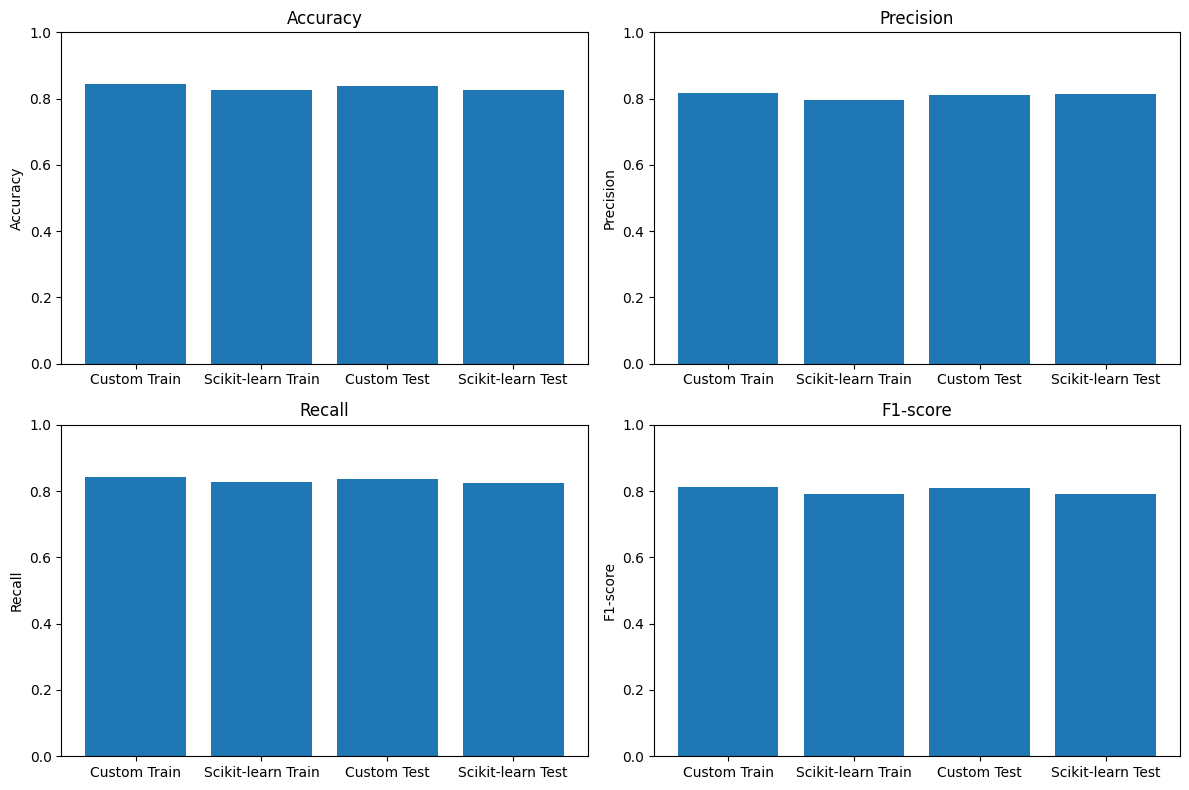

In [ ]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
custom_train_metrics = [train_accuracy, train_precision, train_recall, train_f1]
sgd_train_metrics = [sgd_train_accuracy, sgd_train_precision, sgd_train_recall, sgd_train_f1]
custom_test_metrics = [test_accuracy, test_precision, test_recall, test_f1]
sgd_test_metrics = [sgd_test_accuracy, sgd_test_precision, sgd_test_recall, sgd_test_f1]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, metric in enumerate(metrics):
    axs[i].bar(['Custom Train', 'Scikit-learn Train', 'Custom Test', 'Scikit-learn Test'],
               [custom_train_metrics[i], sgd_train_metrics[i], custom_test_metrics[i], sgd_test_metrics[i]])
    axs[i].set_title(metric)
    axs[i].set_ylabel(metric)
    axs[i].set_ylim(0, 1)  # Set y-axis limit to 0-1 for metrics

plt.tight_layout()
plt.show()


# Conclusion: What conclusions did we draw from the above comparisons?

- The accuracy of our model reached 84.28%. Compared to the sklearn model, it performs slightly better (+1.64% on training and +1.25% on testing).

- The differences in precision are minimal and nearly negligible on testing (-0.35%).

- Our model's recall is higher compared to the sklearn model (+1.64% on training and +1.25% on testing).

- There are positive differences in F1-Score (+2.12% on training and +1.71% on testing).

These differences indicate that in most cases, our model outperformed the SGD Logistic Regression of scikit-learn in terms of accuracy, precision, recall, and F1 score, especially on training data.